## Tree
#### 1 pattern intro

A tree is a graph that contains the following properties:

* It is undirected - edges do not have specific direction

* It is acyclic - graph without cycle

* It is a connected graph where any two vertices are connected by exactly one path.

* Its nodes can contain values of any data type.


The time complexity for search and insert operations in trees is typically 
O(logn)
, where 
n
 is the number of elements in the tree. In contrast, the time complexity for search and insert operations in arrays and linked lists can be 
O(n)
, where 
n
 is the number of elements in the array or list.

* **classificaiton**: node, root, parent, child, level (root node, top: level 0), edge (parent -> child), sibling (node with the same parent), leaf node (any nodes don't have child), path (3->5->9), subtrees (trees inside big tree)

* **depth**: 

* **height**: longest path from root node to leaf node, height of root node

#### Binary Tree

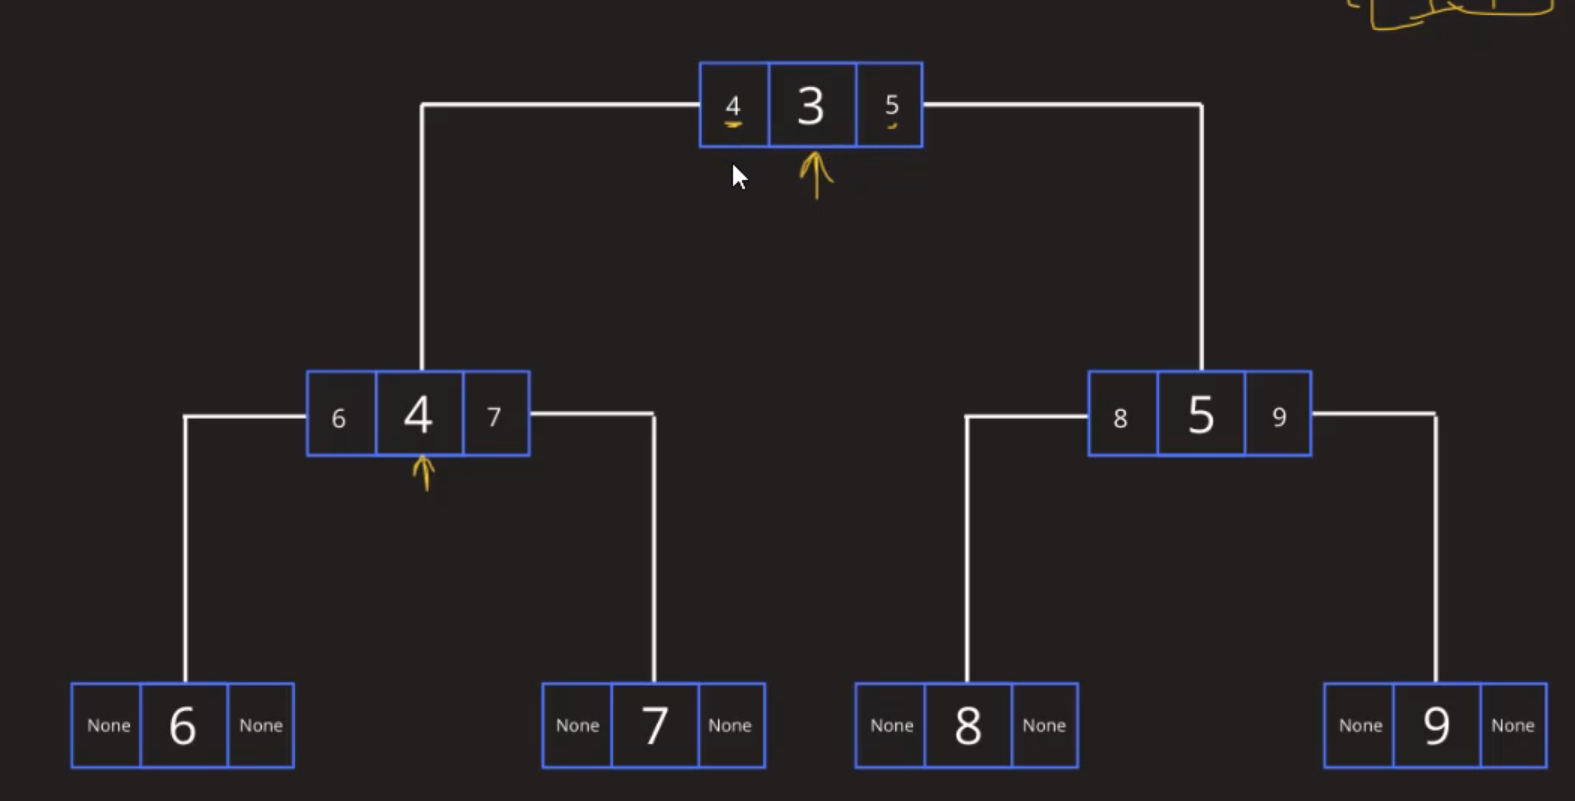

1. maximum two child
2. if no child, leave with None
3. **full binary tree**: have 0 child or two child
4. **Balanced tree**: height of left and right subtrees of every node may differ by at most 1


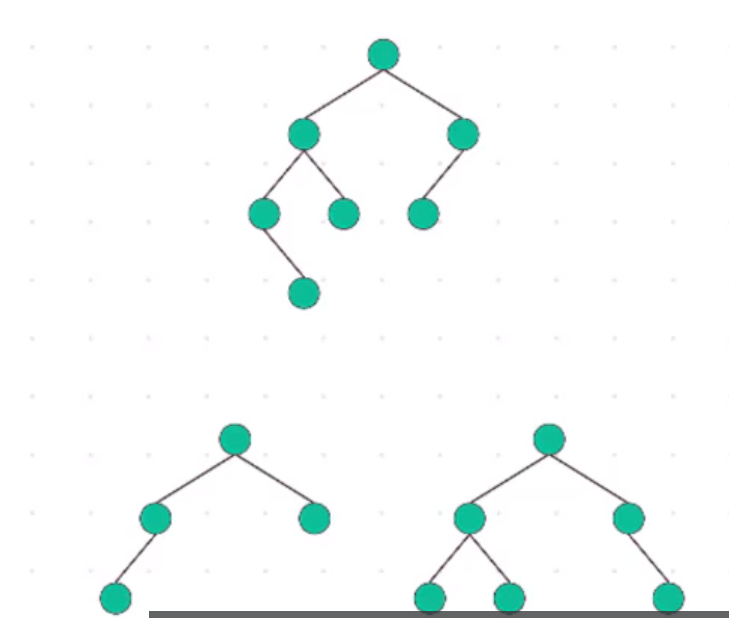


#### Binary Search Tree

**Types**

1. Balanced BST

each leve number of elements = $2^{number~of~levels}$

when height = 2; $n = 2^{h+1}-1$, where he is the height

complexity of search: log(n)

* search




2. Unbalanced BST

left one is balanced since height difference is 0 whereas right part height difference is 2
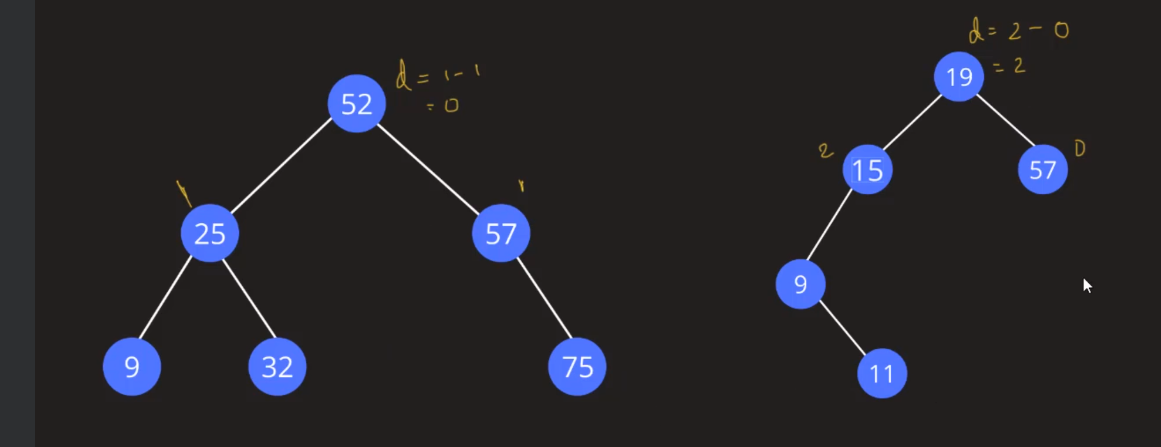




## Tree traversal

#### 1.DFS - depth first search. Tricks

**basic**: go deep instead of level wise. It will get into the sequence of connected nodes till the point we reach the last element.

**Different classifications**:


1. **Pre order traversal**

We start at the root node and visit it first. Then, we recursively traverse the left subtree, followed by the right subtree. This means we explore nodes in the order of root, left, and right. It’s like starting at the top of a tree and moving down, exploring branches as we go. Here are the steps required to implement this algorithm:
**root -> left -> right**

    1. Traverse the left subtree: We recursively traverse the left subtree, starting from the root node. We visit each node in the traversal. If the left child node doesn’t exist, we move to step 2.

    2. Traverse the right subtree: We repeat step 1 starting from the right child node of the current node. If the right child node doesn’t exist, we visit the current node.

    3. We repeat steps 1–2 until all nodes in the tree have been visited.



Asuming tree follows: [A,B,C,D,E,F]. A is the root node. B, C are children. B is the root of D and E. C is the root of F. D is the left side

* tree follows root - left - right. ABDECF

* traversal logic: reach first time, add to result. 



2. **In order traversal**

Starting from the root, we first traverse the left subtree, then visit the current node, and finally explore the right subtree. This order means we’ll visit nodes in ascending order if the tree represents numbers. It’s like exploring a tree from the bottom-left corner to the right, moving up gradually. Here are the steps required to implement this algorithm:

    1. Traverse the left subtree: We recursively traverse the left subtree, starting from the root node. If the left child node doesn’t exist, we visit the current node.

    2. Traverse the parent node: After visiting the current node in step 1, we visit its parent node.

    3. Traverse the right subtree: We repeat step 1 starting from the right child node. If the right child node doesn’t exist, we visit the current node.

    4. We repeat steps 1–3 until all nodes in the tree have been visited.


**left - root - right： DBEAFC**
* meet 2nd time - add to result


3. **post order traevrsal**

**left - right - root: DEBFCA**
Starting from the root, we first traverse the left subtree, then the right subtree, and finally visit the current node. This order means we explore nodes from the bottom up, going from the leaves toward the root. It’s like examining a tree from its outermost branches inward, reaching the trunk last. Here are the steps required to implement this algorithm:

    1. Traverse the left subtree: We recursively traverse the left subtree, starting from the root node. If the left child node doesn’t exist, we visit the current node and move to step 2.

    2. Traverse the right subtree: We repeat step 1 starting from the right child node. If the right child node doesn’t exist, we visit the current node.

    3. Traverse the parent node: After visiting the current node in step 2, we visit its parent node.

    4. We repeat steps 1–3 until all nodes in the tree have been visited.



* last time meet - add to result. If the element no further left or right children, this is your last time to visit this tree. Node has been complete searched then it can be added to result



In [ ]:
class Node:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None



class BinaryTree:
    def __init__(self,root):
        self.root = Node(root)
    
    def preorder(self,start,traversal):
        # root - left - right
        # return empty is start is None
        if start is None:
            # return to end the recursion
            return
        
        # root -> left -> right
        traversal.append(start.value)

        # if left is None, recursion will be jumped out
        self.preorder(start.left,traversal)
        self.preorder(start.right,traversal)

        return traversal


    def ineorder(self,start,traversal):
        # left -> root -> right
        # return empty is start is None
        if start is None:
            # return to end the recursion
            # call back operation
            return
        
        self.preorder(start.left,traversal)
        traversal.append(start.value)
        self.preorder(start.right,traversal)

        return traversal
    

    def posteorder(self,start,traversal):
        # left -> root -> right
        # return empty is start is None
        if start is None:
            # return to end the recursion
            # call back operation
            return
        
        # root -> left -> right
    
        self.preorder(start.left,traversal)
        self.preorder(start.right,traversal)
        traversal.append(start.value)

        return traversal

#### Q1 
Flatten of Binary Tree to linked list. Pre-order traversal

LC 114


In [ ]:
# Definition for a binary tree node.
# it's quite crazy
from typing import Optional
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

class Solution:
    def flatten(self, root: Optional[TreeNode]) -> None:
        """
        Do not return anything, modify root in-place instead.
        """
        current = root

        while current:
            # current root has left and right
            # preorder will firstly traverse left
            # so you need to find the stitching point last in left tree

            if current.left:
                last = current.left
                # find the stitching point on the right
                while last.right:
                    last = last.right
                
                # stitch last with right
                last.right = current.right
                current.right = current.left
                current.left = None
            
            
            # move current to next level
            current = current.right





#### Application of DFS

* Tree data structure: The input data is in the form of a tree, or the cost of transforming it into a tree is low.

* Balanced/low branching factor: The tree is balanced or has a low branching factor, where DFS provides efficient exploration due to less recursion or backtracking.

* Hierarchical structures: We deal with hierarchical structures like organizational charts or family trees, where traversing from parent to child nodes or vice versa is essential for problem-solving.

* Solution near the leaves: We have reason to believe that the solution is near the leaves of the tree. Instead, if the problem requires exploring all nodes at the same depth before moving to the next level. This can be done more optimally by the breadth-first search (BFS) algorithm.

* Traversal along paths: Components of the solution are listed along paths from the root to the leaves, and finding the optimal solution requires traversal along these paths. A classic example of this is finding the height of a given tree.

* Explore all possible paths: The problem requires exploring all possible paths in the tree to find a solution or enumerate all valid solutions. Instead, if finding the shortest or optimal path is crucial, especially in scenarios like route planning or maze solving, BFS might provide a more suitable approach.


Find products in a price range: We convert the prices of all products into a binary search tree and perform a variation of preorder traversal on the tree. We start at the root and check if its value lies in the range. If it does, we add it to the output array. We then check if the value is greater than or equal to the lower bound. If it is, we will call the preorder traversal on the left child of the node. If the node’s value is less than or equal to the upper bound, we’ll also call the preorder traversal on the right child of the node. We repeat this process until the tree has been traversed and then return the output array.

Dependency resolution: In the dependency graph of a software project, each module is represented as a node, and dependencies between modules are represented as directed edges. As DFS traverses the graph, it naturally produces a topological ordering of the nodes. In this ordering, each module appears before its dependencies, ensuring a valid build order.

Syntax tree analysis: In compilers and interpreters, source code is typically represented as syntax trees. DFS can be used to traverse these trees for tasks such as code generation, optimization, or static analysis.

#### 2. BFS - breadth first search

we need queue - first in first out

Procedure:
1. add root node to queue
2. loop the node to get children enque them
3. remove 1st and add to traversal. continue looping


**Basic**: search per tree level. Traverse elements according to their level

utilize queue and traversal. Once an element is traversal, add it to traversal. add their children to queue

**time complexity**: O(log(n))
**space complexity**: O(n)

In [ ]:
class Node():
    def __init__(self,value):
        self.value = value
        self.left = None
        self.right = None

class Queue():
    def __init__(self):
        self.items = []
    
    # add item to the end of the list
    def enqueue(self,item):
        self.items.append(item)
    
    # remove the first item from the list
    def dequeue(self):
        if len(self.items):
            return self.items.pop(0)
    
    # check the first item in the list
    def peek(self):
        if len(self.items):
            return self.items[0].value
    
    def __len__(self):
        return len(self.items)


class BinaryTree():
    def __init__(self,root):
        self.root = Node(root)
    # traversal the tree in level order
    def levelorder(self,start):
        # is node is None, stop recusion
        if start is None:
            return
        
        # add first node to the queue
        queue = Queue()
        queue.enqueue(start)
        traversal = []

        while len(queue) > 0:
            # first in first out
            # add the first node to the traversal list
            traversal.append(queue[0].value)
            # then temove the first itme - dequeue
            node = queue.dequeue()

            # add the left and right node to the queue
            if node.left:
                queue.enqueue(node.left)
            if node.right:
                queue.enqueue(node.right)
        
        return traversal


Given the root of a binary tree, return the maximum sum of any non-empty path.

A path in a binary tree is defined as follows:

A sequence of nodes in which each pair of adjacent nodes must have an edge connecting them.
A node can only be included in a path once at most.
Including the root in the path is not compulsory.


In [2]:
# some data class
class TreeNode:
    def __init__(self,data):
        self.data = data
        self.left = None
        self.right = None

    
from typing import List
from queue import Queue

class BinaryTree:
    def __init__(self, nodes):
        self.root = self.createBinaryTree(nodes)

    def createBinaryTree(self, nodes):
        if len(nodes) == 0:
            return None

        # Create the root node of the binary tree
        root = TreeNode(nodes[0].data)

        # Create a queue and add the root node to it
        queue = Queue()
        queue.put(root)

        # Start iterating over the list of nodes starting from the second node
        i = 1
        while i < len(nodes):
            # Get the next node from the queue
            curr = queue.get()

            # If the node is not None, create a new TreeNode object for its left child,
            # set it as the left child of the current node, and add it to the queue
            if nodes[i] is not None:
                curr.left = TreeNode(nodes[i].data)
                queue.put(curr.left)

            i += 1

            # If there are more nodes in the list and the next node is not None,
            # create a new TreeNode object for its right child, set it as the right child
            # of the current node, and add it to the queue
            if i < len(nodes) and nodes[i] is not None:
                curr.right = TreeNode(nodes[i].data)
                queue.put(curr.right)

            i += 1

        # Return the root of the binary tree
        return root





In [ ]:
from typing import List
from queue import Queue

class BinaryTree:
    def __init__(self, nodes):
        self.root = self.createBinaryTree(nodes)

    def createBinaryTree(self, nodes):
        if len(nodes) == 0:
            return None

        # Create the root node of the binary tree
        root = TreeNode(nodes[0].data)

        # Create a queue and add the root node to it
        queue = Queue()
        queue.put(root)

        # Start iterating over the list of nodes starting from the second node
        i = 1
        while i < len(nodes):
            # Get the next node from the queue
            curr = queue.get()

            # If the node is not None, create a new TreeNode object for its left child,
            # set it as the left child of the current node, and add it to the queue
            if nodes[i] is not None:
                curr.left = TreeNode(nodes[i].data)
                queue.put(curr.left)

            i += 1

            # If there are more nodes in the list and the next node is not None,
            # create a new TreeNode object for its right child, set it as the right child
            # of the current node, and add it to the queue
            if i < len(nodes) and nodes[i] is not None:
                curr.right = TreeNode(nodes[i].data)
                queue.put(curr.right)

            i += 1

        # Return the root of the binary tree
        return root